Запишем нашу функцию $y''(x) + p(x)y' + q(x)y = f(x)$

<br/>

y(0) + y'(0) = 1.3333
<br/>

y'(1) = 0.9280

$y_0 = sin(sh(x)) + \frac{x}{3}$


$p(x) = - th(x)$
<br/>

$q(x) = ch^2(x)$
<br/>

$ f(x) = \frac{xch^2(x)-th(x)}{3}$

$y''+p(x)y'+q(x)y=f(x)$

$A_1y(a)+B_1y'(a)=C_1$
    
$A_2y(b)+B_2y'(b)=C_2$

In [10]:
import numpy as np 
import matplotlib.pyplot as plt
import scipy
import math

In [11]:
def p(x):
    return (-1) * np.tanh(x)

def q(x):
    return np.cosh(x) ** 2

def f(x):
    return ((np.cosh(x) ** 2) * x - np.tanh(x)) / 3

def secDerriative(x, y, z):
    return (-1) * p(x) *  z + (-1) * q(x) * y + f(x) 

def Solution(x):
    return np.sin(np.sinh(x)) + (x / 3)

In [24]:
A1 = 1
B1 = 1
# C1 = 1.3333
C1 = 4/3

# A2 = 0
# B2 = 1
# # C2 = 0.9280
# C2 = 0.9279709156219082488664262886286158300041352982681432734047960706

A2 = 1
B2 = 0
C2 = 1.2561007221449396

x0 = 0
xf = 1

$\begin{cases}
a_0=0\\
b_0=-hB_1+h^2A_1\\
c_0=hB_1\\
d_0=C_1\\
a_k=1-\frac{hp_k}{2}\\
b_k=-2+h^2q_k\\
c_k=1+\frac{hp_k}{2}\\
d_k=f_k\\
a_n=hB_2\\
b_n=-hB_2+h^2A_2\\
c_n=0\\
d_n=C_2
\end{cases}$

In [44]:
def forward(A, B, C, D, n):
    Ai = [-C[0]  / B[0]]
    Bi = [D[0] / B[0]]
    for i in range(1, n):
        Ai.append(- C[i] / (B[i] + A[i] * Ai[i-1]))
        Bi.append((D[i] - A[i]*Bi[i-1]) / (B[i] + A[i] * Ai[i-1]))
    return Ai, Bi

def backward(Ai, Bi, n):
    Y = []
    Y.append(Bi[n-1])
    for i in range(n - 2, -1, -1):
        Y.append(Bi[i] + Ai[i] * Y[n - i - 2])
    return Y[::-1]


def triangeMatr(order, amount):
    n = amount + 1
    h = 1 / (n - 1)
    X = np.linspace(x0, xf, n)
    #print(X)

    P = [p(i) for i in X]
    Q = [q(i) for i in X]
    F = [f(i) for i in X]
    
    if order == 0:
        A = [0]
        B = [A1-B1/h]
        C = [B1/h]
        D = [C1]

    if order != 0:
        A = [0]
        B = [-2 + 2*h*A1/B1 - A1*h*h*P[0]/B1 + Q[0]*h*h]
        C = [2]
        D = [F[0]*h*h - C1*h*h*P[0]/B1 + 2*h*C1/B1]

    for i in range(1, n-1):
        A.append(1 - h*P[i]/2)
        B.append(-2 + h*h*Q[i])
        C.append(1 + P[i]/2*h)
        D.append(F[i]*h*h)

    if order == 0:
        A.append(-B2/h)
        B.append(A2 + B2 / h)
        C.append(0)
        D.append(C2)

    if order != 0:
        A.append(2)
        B.append(-2 - 2*h*A2/B2 - P[-1]*h*h*A2/B2 + Q[-1]*h*h)
        C.append(0)
        D.append(F[-1]*h*h - h*h*P[-1]*C2/B2 - 2*h*C2/B2)
            
    AA, BB = forward(A, B, C, D, n)
    Y = backward(AA, BB, n)
    
    return Y

$y_i=B_i+A_iy_{i+1}$

$A_i=-\frac{c_i}{b_i + a_iA_{i-1}}$

$B_i=\frac{d_i-a_iB_{i-1}}{b_i + a_iA_{i-1}}$

$A_0=-\frac{c_0}{b_0}$<br/> $B_0=\frac{d_0}{b_0}$

$y_{n-1}=B_{n-1}+A_{n-1}y_n$

In [47]:
print(triangeMatr(order = 0, amount = 20)[-1])
print(trueY[-1])

1.2561007221449396
1.2561007221449396


ZeroDivisionError: float division by zero

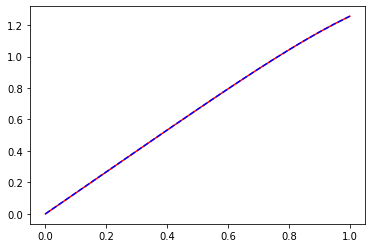

In [36]:
X = [x0 + i / 20 for i in range(21)]
Solutions = [Solution(i) for i in X]
plt.plot(X, Solutions, color="red", label="Real solution")

order1 = triangeMatr(order = 0, amount = 20)
plt.plot(X, order1, linestyle="--", color="blue", label="order 1")

order1 = triangeMatr(order = 1, amount = 20)
plt.plot(X, order1, linestyle="--", color="black", label="order 2")

plt.legend(loc="lower right")
plt.grid(True)

In [37]:
def logEr(order):
    hlog = []
    ylog = []

    for n in range(20,300,50):
        h = 1/n
        y = triangeMatr(order, n)
        X = [x0 + i / n for i in range(n+1)]
        sol = [Solution(x) for x in X]
        deltas = [abs(y[i]-sol[i]) for i in range(n)]
        delta = max(deltas)
        hlog.append(np.log(h))
        ylog.append(np.log(delta))
    return hlog, ylog

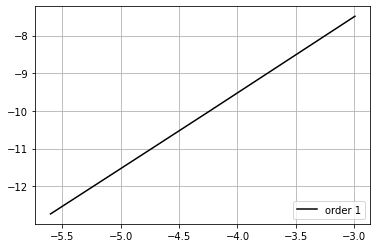

In [38]:
hlog0, ylog0 = logEr(0)
plt.plot(hlog0, ylog0, linestyle="-", color="black", label="order 1")

plt.legend(loc="lower right")
plt.grid(True)

In [39]:
hlog1, ylog1 = logEr(1)
plt.plot(hlog1, ylog1, linestyle="-", color="black", label="order 2")

plt.legend(loc="lower right")
plt.grid(True)

ZeroDivisionError: float division by zero

In [33]:
Solution(1)

1.2561007221449396